# Part 1: Representations

In this part of the assignment, you consider synthetic data that cannot be accurately classified with standard logistic regression. Instead, you will show how a different representation can be used to effectively classify the data, and that a neural network (specifically a multilayer perceptron) can automatically learn such a representation directly from the original data.

**Learning objectives.** You will:
1. Reason about separability, decision boundaries, and data representations.
2. Use a multilayer perceptron to show that a neural network can automatically learn a helpful data representation for classification.

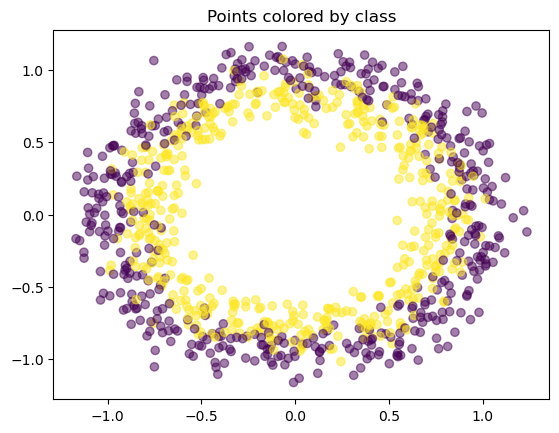

In [1]:
# Run but DO NOT MODIFY this code

# Import libraries
import numpy as np
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.1, random_state=2024)

ax = plt.subplot()
ax.set_title("Points colored by class")
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

## Task 1

For this part of the assignment you can use the same data for training and evaluating. We will only focus on whether we can fit the pattern in the data.

Build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to predict the value of `y` (either `0` or `1`) as a function of the two features (columns) in the design matrix `X`. Use the parameter setting `penalty = 'None'` (this will train a basic model without applying any regularization). 

Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of your model's predictions compared to the true `y`. Report your results and **briefly explain why the accuracy is so low**, referencing the visualization and the how logistic regression works.

In [2]:
# Write code for task 1 here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=2024)

model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.4400


Our accuracy score after implementing the Logistic Regression model is 0.440, which means that our logistic regression model isn't even better than random guessing (accuracy of 0.5). This is because Logistic regression, by design, is a linear classifier. It tries to find a straight line that separates the classes. However, since the two classes are structured in a circular pattern, no straight line can effectively separate them. This results in poor performance from logistic regression.

## Task 2

Show that there exists a different representation of the data for which logistic regression can accurately classify (greater than 80% accuracy) the data.

To do so, compute a representation of the `X` data **without using `y`**, then use your representation (call it `X_rep`) to build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to predict `y` as a function of `X_rep`. Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (you should get at least 80%). Report your results and briefly explain why your representation enables logistic regression to  accuractely classify the data.

*Hint:* Observe from the visualization how one class tends to be closer to the origin and another farther from the origin.

In [3]:
# Write code for task 2 here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_rep = np.sqrt(X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)  

model = LogisticRegression(penalty=None)  
model.fit(X_rep, y)

y_pred = model.predict(X_rep)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8300


This is a better classification of the data, since the key detail is that class 0 and class 1 are distributed in a circular pattern, with class 0 forming the outer circle and class 1 forming the inner circle. By computing the distance from the origin, we basically "linearize" this circular pattern, creating a feature that allows logistic regression to separate the two classes using a threshold of measuring Euclidean distance. 

## Task 3

The representation in task 2 was (relatively) easy to reason about because our data in this exercise are two-dimensional and synthetic. With real data, it can be incredibly time-consuming to determine a good representation of the data by hand (a process sometimes referred to as "feature engineering").

Show that you can achieve comparable results **without** explicitly computing a different representation of `X` by using a multilayer perceptron to automatically learn a useful representation of the data for classification.

Specifically, use Scikit-Learn to build a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) classifier that achieves at least 80% accuracy predicting `y` using only `X`, and not any explicitly computed transformation of `X`, as input. Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (you should get at least 80%). You may need to experiment with different values of the model architecture (especially the number of hidden units) and the learning hyperparameters: You should try to find a small number of hidden units that suffice for the task.

In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, learning_rate='constant', 
    random_state=None)
mlp.fit(X, y)
y_pred = mlp.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"MLP Accuracy: {accuracy:.4f}")

MLP Accuracy: 0.8370
